### UFC Capstone Project
This dataset obtained from kaggle includes all UFC fights from mid 2010 onward.
My analysis focused on establishing which pre-fight variables are most relevant in predicting victories.
I seperated female from male fighters to see if there are different variables of interest.
In conlusion I found that blue odds (where blue is the name given to the second fighter), win streak difference, 
reach difference, and age difference were most relevant in male fights.
For female fights blue odds, lose streak difference, and loss difference were the most relevant variables.

#### Importing, Cleaning, and Exploring Data

In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [2]:
#Import UFC Dataset
df = pd.read_csv('ufc-cap-stone3.csv')

In [3]:
#Add a boolean column for if Red wins
df['Winner_c_boolean']=np.where(df['Winner_c']>0, 1, 0)

In [4]:
#Add a boolean column for if Red is a better rank
df['better_rank_boolean']=np.where(df['better_rank_c']>0, 1, 0)

In [5]:
#Add a column for winner name and count top fight winners
df['Winner_name']=np.where(df['Winner']=='Red', df['R_fighter'], df['B_fighter'])
print(df['Winner_name'].value_counts().head(20))

Donald Cerrone        23
Dustin Poirier        20
Charles Oliveira      19
Neil Magny            18
Max Holloway          18
Jon Jones             17
Rafael Dos Anjos      17
Darren Elkins         16
Derrick Lewis         16
Demian Maia           16
Jim Miller            16
Edson Barboza         16
Francisco Trinaldo    16
Joseph Benavidez      15
Glover Teixeira       15
Tony Ferguson         15
Demetrious Johnson    15
Beneil Dariush        15
Brad Tavares          14
Kamaru Usman          14
Name: Winner_name, dtype: int64


In [6]:
#Describing the dataset and filling the null values
print(df.info(), df.describe())
df = df.fillna(0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   R_fighter                 4896 non-null   object 
 1   B_fighter                 4896 non-null   object 
 2   R_odds                    4895 non-null   float64
 3   B_odds                    4896 non-null   int64  
 4   date                      4896 non-null   object 
 5   Winner                    4896 non-null   object 
 6   Winner_c                  4896 non-null   int64  
 7   weight_class              4896 non-null   object 
 8   gender                    4896 non-null   object 
 9   no_of_rounds              4896 non-null   int64  
 10  B_Stance                  4894 non-null   object 
 11  R_Stance                  4896 non-null   object 
 12  lose_streak_dif           4896 non-null   int64  
 13  win_streak_dif            4896 non-null   int64  
 14  longest_

In [7]:
#Create two datasets for male and female fights and describe them
df_m=df[df['gender']=='MALE']
df_f=df[df['gender']=='FEMALE']
print(df_m.describe())
print(df_f.describe())

            R_odds       B_odds     Winner_c  no_of_rounds  lose_streak_dif  \
count  4384.000000  4384.000000  4384.000000   4384.000000      4384.000000   
mean   -113.993613    64.309763     0.164690      3.179060         0.104471   
std     262.099765   245.056859     0.986458      0.567272         0.992115   
min   -1650.000000 -1200.000000    -1.000000      3.000000        -5.000000   
25%    -250.750000  -145.000000    -1.000000      3.000000         0.000000   
50%    -150.000000   130.000000     1.000000      3.000000         0.000000   
75%     130.000000   220.000000     1.000000      3.000000         0.000000   
max     775.000000  1300.000000     1.000000      5.000000         6.000000   

       win_streak_dif  longest_win_streak_dif      win_dif     loss_dif  \
count     4384.000000             4384.000000  4384.000000  4384.000000   
mean        -0.175867               -0.794708    -1.494526     0.404425   
std          1.757316                2.079486     4.189060     

In [8]:
print(df_m['Winner_name'].value_counts().head(13), df_f['Winner_name'].value_counts().head(14))

Donald Cerrone        23
Dustin Poirier        20
Charles Oliveira      19
Max Holloway          18
Neil Magny            18
Rafael Dos Anjos      17
Jon Jones             17
Demian Maia           16
Jim Miller            16
Francisco Trinaldo    16
Darren Elkins         16
Derrick Lewis         16
Edson Barboza         16
Name: Winner_name, dtype: int64 Amanda Nunes            14
Jessica Andrade         13
Valentina Shevchenko    11
Joanna Jedrzejczyk      10
Tecia Torres             9
Katlyn Chookagian        9
Raquel Pennington        9
Rose Namajunas           8
Carla Esparza            8
Angela Hill              8
Lauren Murphy            7
Alexis Davis             7
Joanne Calderwood        7
Holly Holm               7
Name: Winner_name, dtype: int64


In [9]:
#Male fighters who fought most frequently
male_fr=df_m['R_fighter']
male_fb=df_m['B_fighter']
male_f= male_fr.append(male_fb)
print(male_f.value_counts().head(9))

Donald Cerrone      36
Jim Miller          30
Charles Oliveira    27
Edson Barboza       26
Demian Maia         26
Rafael Dos Anjos    26
Dustin Poirier      25
Neil Magny          25
Jeremy Stephens     25
dtype: int64


In [10]:
#Female fighters who fought most frequently
fem_fr = df_f['R_fighter']
fem_fb = df_f['B_fighter']
fem_f = fem_fr.append(fem_fb)
print(fem_f.value_counts().head(8))

Jessica Andrade       20
Angela Hill           18
Randa Markos          16
Amanda Nunes          15
Tecia Torres          14
Joanna Jedrzejczyk    14
Raquel Pennington     14
Jessica Eye           14
dtype: int64


In [11]:
#Weightclasses and the frequency of their appearences
print(df_m['weight_class'].value_counts())
print(df_f['weight_class'].value_counts())

Lightweight          855
Welterweight         830
Middleweight         593
Featherweight        566
Bantamweight         493
Light Heavyweight    394
Heavyweight          385
Flyweight            235
Catch Weight          33
Name: weight_class, dtype: int64
Women's Strawweight      203
Women's Bantamweight     156
Women's Flyweight        136
Women's Featherweight     17
Name: weight_class, dtype: int64


In [12]:
#Establish datasets for each weightclass
df_m_l=df_m[df_m['weight_class']=='Lightweight']
df_m_w=df_m[df_m['weight_class']=='Welterweight']
df_m_m=df_m[df_m['weight_class']=='Middleweight']
df_m_f=df_m[df_m['weight_class']=='Featherweight']
df_m_b=df_m[df_m['weight_class']=='Bantamweight']
df_m_lh=df_m[df_m['weight_class']=='Light Heavyweight']
df_m_h=df_m[df_m['weight_class']=='Heavyweight']
df_m_f=df_m[df_m['weight_class']=='Flyweight']
df_m_c=df_m[df_m['weight_class']=='Catch Weight']
df_f_s=df_f[df_f['weight_class']=="Women's Strawweight"]
df_f_b=df_f[df_f['weight_class']=="Women's Bantamweight"]
df_f_f=df_f[df_f['weight_class']=="Women's Flyweight"]
df_f_f_w=df_f[df_f['weight_class']=="Women's Featherweight"]

In [13]:
#Analyzing correlations between prefight conditions and male fight red wins
ind_var_m = df_m[['R_odds', 'B_odds', 'no_of_rounds', 'lose_streak_dif', \
               'win_streak_dif', 'longest_win_streak_dif', 'win_dif', 'loss_dif', 'total_round_dif', \
               'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif', 'weightclass_rank_dif', 'better_rank_boolean']]
dep_var_m = df_m['Winner_c_boolean']
ind_var_m = sm.add_constant(ind_var_m)
regression_model_m = sm.OLS(dep_var_m, ind_var_m).fit()
regression_model_m.summary()

/Users/chris/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Winner_c_boolean   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     36.46
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          1.92e-106
Time:                        15:21:39   Log-Likelihood:                -2846.7
No. Observations:                4384   AIC:                             5727.
Df Residuals:                    4367   BIC:                             5836.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.5671      0.044     12.819      0.000       0.480       0.654
R_odds                    -0.0001      0.000     -1.225      0.221      -0.000    8.62e-05
B_odds                     0.0005      0.000      3.925      0.000       0.000       0.001
no_of_rounds              -0.0097      0.014     -0.683      0.495      -0.037       0.018
lose_streak_dif            0.0068      0.008      0.839      0.401      -0.009       0.023
win_streak_dif            -0.0105      0.005     -2.300      0.022      -0.019      -0.002
longest_win_streak_dif     0.0064      0.005      1.200      0.230      -0.004       0.017
win_dif                   -0.0028      0.005     -0.533      0.594      -0.013       0.007
loss_dif                  -0.0006      0.003     -0.208      0.835      -0.007       0.005
total_round_dif           -0.0003      0.001     -0.355      0.722      -0.002       0.001
ko_dif                     0.0084      0.005      1.672      0.095      -0.001       0.018
sub_dif                    0.0019      0.005      0.357      0.721      -0.008       0.012
height_dif                 0.0011      0.001      0.811      0.417      -0.002       0.004
reach_dif                 -0.0021      0.001     -2.117      0.034      -0.004      -0.000
age_dif                   -0.0047      0.002     -3.065      0.002      -0.008      -0.002
weightclass_rank_dif       0.0006      0.002      0.290      0.772      -0.003       0.004
better_rank_boolean        0.0055      0.019      0.287      0.774      -0.032       0.043
==============================================================================
Omnibus:                    29084.337   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              454.693
Skew:                          -0.273   Prob(JB):                     1.84e-99
Kurtosis:                       1.519   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Extracting the coefficients for male red wins
coef_m=regression_model_m.params
print(coef_m)

const                     0.567099
R_odds                   -0.000143
B_odds                    0.000490
no_of_rounds             -0.009661
lose_streak_dif           0.006827
win_streak_dif           -0.010504
longest_win_streak_dif    0.006417
win_dif                  -0.002790
loss_dif                 -0.000632
total_round_dif          -0.000297
ko_dif                    0.008390
sub_dif                   0.001891
height_dif                0.001084
reach_dif                -0.002137
age_dif                  -0.004676
weightclass_rank_dif      0.000576
better_rank_boolean       0.005453
dtype: float64


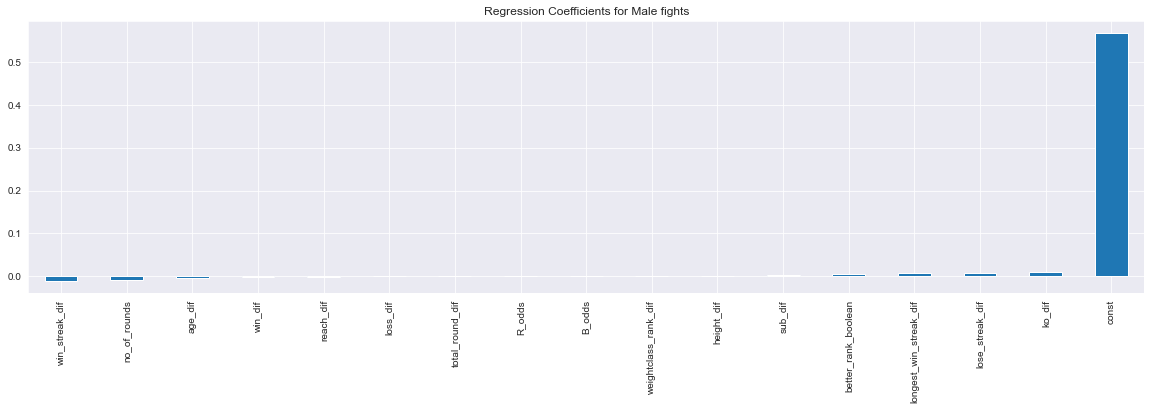

In [15]:
#Plot these coefficents in ascending order
coef_m.sort_values().plot(kind='bar')
plt.title('Regression Coefficients for Male fights')
plt.show()

In [16]:
#Analyzing correlations against male red wins for variables with p values under 0.05
ind_var_m2 = df_m[['B_odds', 'win_streak_dif', 'reach_dif', 'age_dif']]
dep_var_m2 = df_m['Winner_c_boolean']
ind_var_m2 = sm.add_constant(ind_var_m2)
regression_model_m2 = sm.OLS(dep_var_m2, ind_var_m2).fit()
regression_model_m2.summary()

/Users/chris/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Winner_c_boolean   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     143.6
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          1.56e-115
Time:                        15:21:40   Log-Likelihood:                -2851.4
No. Observations:                4384   AIC:                             5713.
Df Residuals:                    4379   BIC:                             5745.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5419      0.007     74.061      0.000       0.528       0.556
B_odds             0.0006   3.02e-05     20.866      0.000       0.001       0.001
win_streak_dif    -0.0085      0.004     -2.067      0.039      -0.017      -0.000
reach_dif         -0.0016      0.001     -2.084      0.037      -0.003   -9.43e-05
age_dif           -0.0047      0.001     -3.325      0.001      -0.007      -0.002
==============================================================================
Omnibus:                    29229.384   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.811
Skew:                          -0.277   Prob(JB):                     1.05e-99
Kurtosis:                       1.521   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#Extracting coeffcients for these variables
coef_m2=regression_model_m2.params
print(coef_m2)

const             0.541898
B_odds            0.000630
win_streak_dif   -0.008476
reach_dif        -0.001592
age_dif          -0.004682
dtype: float64


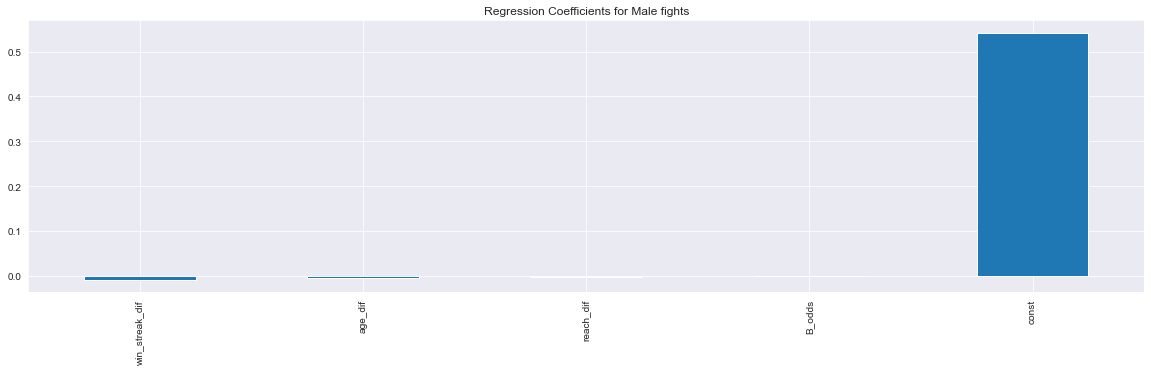

In [18]:
#Ploting these coefficients in ascending order
coef_m2.sort_values().plot(kind='bar')
plt.title('Regression Coefficients for Male fights')
plt.show()

In [19]:
#Analyze coefficients against female red wins
ind_var_f = df_f[['R_odds', 'B_odds', 'no_of_rounds', 'lose_streak_dif', \
               'win_streak_dif', 'longest_win_streak_dif', 'win_dif', 'loss_dif', 'total_round_dif', \
               'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif', 'weightclass_rank_dif', 'better_rank_boolean']]
dep_var_f = df_f['Winner_c_boolean']
ind_var_f = sm.add_constant(ind_var_f)
regression_model_f = sm.OLS(dep_var_f, ind_var_f).fit()
regression_model_f.summary()

/Users/chris/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Winner_c_boolean   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     5.273
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           2.53e-10
Time:                        15:21:40   Log-Likelihood:                -321.36
No. Observations:                 512   AIC:                             676.7
Df Residuals:                     495   BIC:                             748.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.5049      0.123      4.112      0.000       0.264       0.746
R_odds                     0.0001      0.000      0.442      0.659      -0.000       0.001
B_odds                     0.0007      0.000      2.650      0.008       0.000       0.001
no_of_rounds               0.0076      0.040      0.193      0.847      -0.070       0.085
lose_streak_dif           -0.0421      0.024     -1.758      0.079      -0.089       0.005
win_streak_dif             0.0184      0.018      1.042      0.298      -0.016       0.053
longest_win_streak_dif     0.0267      0.022      1.200      0.231      -0.017       0.070
win_dif                   -0.0172      0.025     -0.697      0.486      -0.066       0.031
loss_dif                   0.0257      0.012      2.176      0.030       0.002       0.049
total_round_dif            0.0019      0.004      0.482      0.630      -0.006       0.010
ko_dif                    -0.0287      0.024     -1.180      0.239      -0.077       0.019
sub_dif                   -0.0113      0.024     -0.465      0.642      -0.059       0.036
height_dif                -0.0014      0.004     -0.376      0.707      -0.009       0.006
reach_dif                 -0.0023      0.002     -1.015      0.311      -0.007       0.002
age_dif                   -0.0009      0.004     -0.216      0.829      -0.009       0.007
weightclass_rank_dif      -0.0015      0.004     -0.356      0.722      -0.010       0.007
better_rank_boolean        0.0527      0.044      1.189      0.235      -0.034       0.140
==============================================================================
Omnibus:                    14603.665   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.756
Skew:                          -0.298   Prob(JB):                     1.57e-11
Kurtosis:                       1.594   Cond. No.                     2.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#Extracting coefficients for these variables
coef_f=regression_model_f.params
print(coef_f)

const                     0.504856
R_odds                    0.000106
B_odds                    0.000749
no_of_rounds              0.007637
lose_streak_dif          -0.042084
win_streak_dif            0.018383
longest_win_streak_dif    0.026721
win_dif                  -0.017162
loss_dif                  0.025726
total_round_dif           0.001921
ko_dif                   -0.028712
sub_dif                  -0.011261
height_dif               -0.001400
reach_dif                -0.002316
age_dif                  -0.000920
weightclass_rank_dif     -0.001481
better_rank_boolean       0.052734
dtype: float64


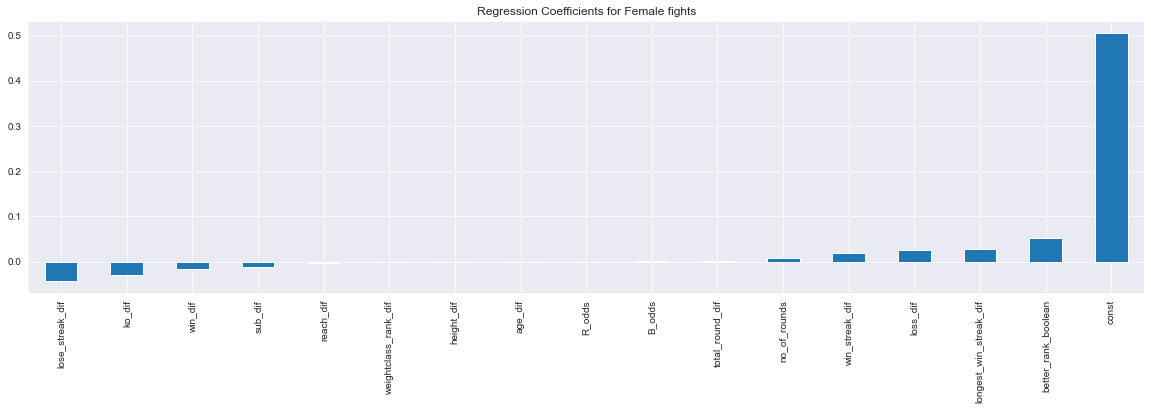

In [21]:
#Plot these variables in ascending order
coef_f.sort_values().plot(kind='bar')
plt.title('Regression Coefficients for Female fights')
plt.show()

In [22]:
#Analyzing variables against female red wins for p values under 0.08
ind_var_f2 = df_f[['B_odds', 'lose_streak_dif', 'loss_dif']]
dep_var_f2 = df_f['Winner_c_boolean']
ind_var_f2 = sm.add_constant(ind_var_f2)
regression_model_f2 = sm.OLS(dep_var_f2, ind_var_f2).fit()
regression_model_f2.summary()

/Users/chris/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Winner_c_boolean   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     25.34
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           2.72e-15
Time:                        15:21:40   Log-Likelihood:                -325.95
No. Observations:                 512   AIC:                             659.9
Df Residuals:                     508   BIC:                             676.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5493      0.021     25.781      0.000       0.507       0.591
B_odds              0.0006   7.52e-05      8.400      0.000       0.000       0.001
lose_streak_dif    -0.0413      0.023     -1.770      0.077      -0.087       0.005
loss_dif            0.0245      0.011      2.241      0.025       0.003       0.046
==============================================================================
Omnibus:                     5793.924   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.657
Skew:                          -0.295   Prob(JB):                     3.68e-12
Kurtosis:                       1.544   Cond. No.                         340.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Extracting coefficients for these variables
coef_f2=regression_model_f2.params
print(coef_f2)

const              0.549340
B_odds             0.000632
lose_streak_dif   -0.041323
loss_dif           0.024458
dtype: float64


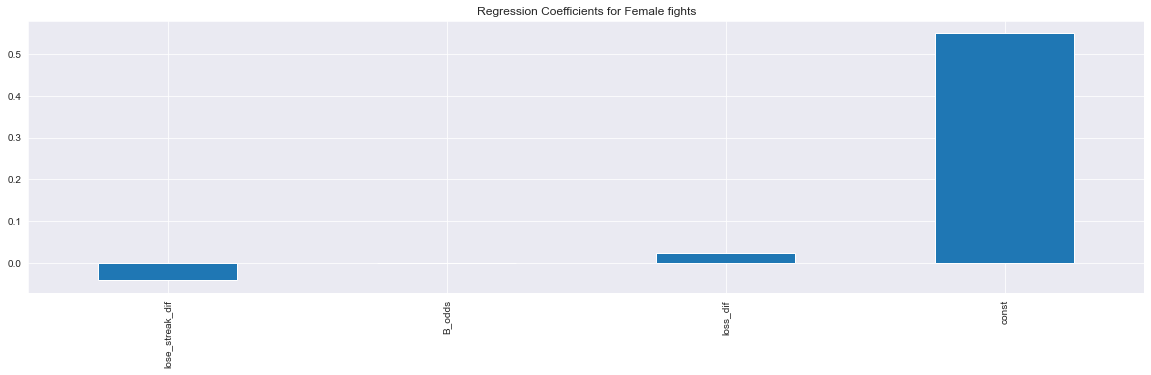

In [24]:
#Plot these variables in ascending order
coef_f2.sort_values().plot(kind='bar')
plt.title('Regression Coefficients for Female fights')
plt.show()

In [25]:
#Removing outliers for male fights  
Q1 = df_m.quantile(.25)
Q3 = df_m.quantile(.75)
IQR = Q3-Q1

lower_limit_m3 = Q1-(1.5*IQR)
upper_limit_m3 = Q3+(1.5*IQR)
Outliers_m3 = df_m[(df_m < lower_limit_m3)|(df_m > upper_limit_m3).any(axis=1)]
no_outliers_m3 = df_m[Outliers_m3.isnull()].dropna()
print(no_outliers_m3)

/var/folders/qd/md7nv8b11hncd73yr_f70_f40000gn/T/ipykernel_36047/1550386689.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Outliers_m3 = df_m[(df_m < lower_limit_m3)|(df_m > upper_limit_m3).any(axis=1)]


                     R_fighter             B_fighter  R_odds  B_odds     date  \
1                Alex Oliveira            Niko Price   170.0  -200.0  10/2/21   
3          Alexander Hernandez          Mike Breeden  -675.0   475.0  10/2/21   
4                  Joe Solecki          Jared Gordon  -135.0   115.0  10/2/21   
8     Douglas Silva de Andrade      Gaetano Pirrello  -280.0   225.0  10/2/21   
10             Alejandro Perez        Johnny Eduardo  -300.0   235.0  10/2/21   
...                        ...                   ...     ...     ...      ...   
4890            Eliot Marshall  Vladimir Matyushenko   145.0  -165.0  3/21/10   
4891              Duane Ludwig         Darren Elkins  -155.0   135.0  3/21/10   
4893            Brendan Schaub         Chase Gormley  -260.0   220.0  3/21/10   
4894               Mike Pierce         Julio Paulino  -420.0   335.0  3/21/10   
4895              Eric Schafer           Jason Brilz   140.0  -160.0  3/21/10   

     Winner  Winner_c      

In [26]:
#Analyze data with no outliers
ind_var_m3 = no_outliers_m3[['B_odds', 'win_streak_dif', 'reach_dif', 'age_dif']]
dep_var_m3 = no_outliers_m3['Winner_c_boolean']
ind_var_m3 = sm.add_constant(ind_var_m3)
regression_model_m3 = sm.OLS(dep_var_m3, ind_var_m3).fit()
regression_model_m3.summary()

/Users/chris/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Winner_c_boolean   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     87.97
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           9.25e-70
Time:                        15:21:51   Log-Likelihood:                -1524.9
No. Observations:                2366   AIC:                             3060.
Df Residuals:                    2361   BIC:                             3089.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5485      0.010     56.016      0.000       0.529       0.568
B_odds             0.0007   4.33e-05     16.753      0.000       0.001       0.001
win_streak_dif     0.0002      0.010      0.023      0.982      -0.019       0.020
reach_dif         -0.0019      0.001     -1.596      0.111      -0.004       0.000
age_dif           -0.0064      0.002     -3.176      0.002      -0.010      -0.002
==============================================================================
Omnibus:                    24647.525   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.096
Skew:                          -0.262   Prob(JB):                     9.76e-49
Kurtosis:                       1.597   Cond. No.                         247.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#Extract coefficients for these variables 
coef_m3=regression_model_m3.params
print(coef_m3)

const             0.548533
B_odds            0.000725
win_streak_dif    0.000229
reach_dif        -0.001904
age_dif          -0.006429
dtype: float64


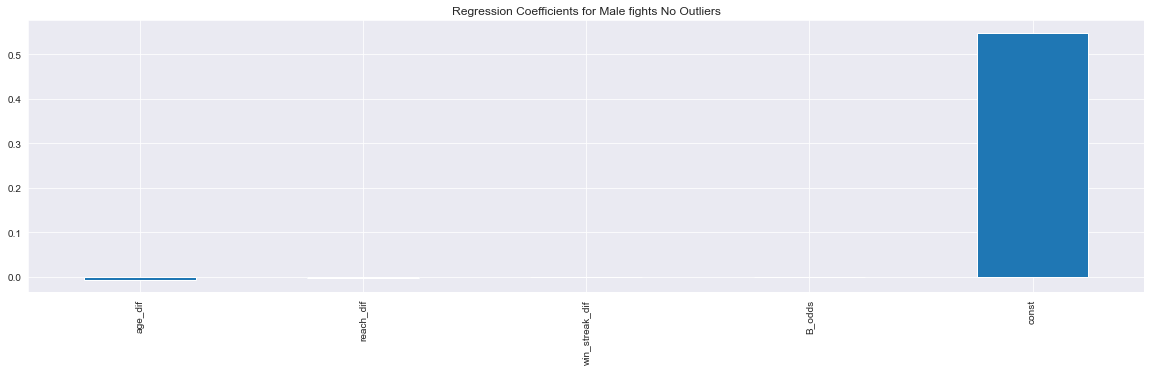

In [28]:
#Plot these variables in ascending order
coef_m3.sort_values().plot(kind='bar')
plt.title('Regression Coefficients for Male fights No Outliers')
plt.show()

In [29]:
#Removing outliers from female fights in areas of interest
Q1_f3 = df_f.quantile(.25)
Q3_f3 = df_f.quantile(.75)
IQR_f3 = Q3_f3-Q1_f3

lower_limit_f3 = Q1_f3-(1.5*IQR_f3)
upper_limit_f3 = Q3_f3+(1.5*IQR_f3)
Outliers_f3 = df_f[(df_f < lower_limit_f3)|(df_f > upper_limit_f3).any(axis=1)]
no_outliers_f3 = df_f[Outliers_f3.isnull()].dropna()
print(no_outliers_f3)

/var/folders/qd/md7nv8b11hncd73yr_f70_f40000gn/T/ipykernel_36047/97115808.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Outliers_f3 = df_f[(df_f < lower_limit_f3)|(df_f > upper_limit_f3).any(axis=1)]


              R_fighter             B_fighter  R_odds  B_odds      date  \
9       Stephanie Egger          Shanna Young  -155.0   135.0   10/2/21   
34     Erin Blanchfield           Sarah Alpar  -435.0   330.0   9/18/21   
36       Emily Whitmire          Hannah Goldy  -125.0   105.0   9/18/21   
42         Molly McCann           Ji Yeon Kim  -120.0   100.0    9/4/21   
73         Tecia Torres           Angela Hill  -160.0   140.0    8/7/21   
...                 ...                   ...     ...     ...       ...   
3717  Roxanne Modafferi     Raquel Pennington   400.0  -450.0  11/30/13   
3765        Rosi Sexton       Jessica Andrade   110.0  -120.0  10/26/13   
3866      Liz Carmouche       Jessica Andrade  -500.0   435.0   7/27/13   
3872       Julie Kedzie  Germaine de Randamie   170.0  -185.0   7/27/13   
3889       Alexis Davis           Rosi Sexton  -500.0   435.0   6/15/13   

     Winner  Winner_c          weight_class  gender  no_of_rounds  ...  \
9       Red         1  Wo

In [30]:
#Analyze 
ind_var_f3 = no_outliers_f3[['B_odds', 'lose_streak_dif', 'loss_dif']]
dep_var_f3 = no_outliers_f3['Winner_c_boolean']
ind_var_f3 = sm.add_constant(ind_var_f3)
regression_model_f3 = sm.OLS(dep_var_f3, ind_var_f3).fit()
regression_model_f3.summary()

/Users/chris/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Winner_c_boolean   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     11.82
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           2.69e-07
Time:                        15:21:51   Log-Likelihood:                -178.11
No. Observations:                 272   AIC:                             364.2
Df Residuals:                     268   BIC:                             378.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5259      0.030     17.269      0.000       0.466       0.586
B_odds              0.0008      0.000      5.878      0.000       0.001       0.001
lose_streak_dif    -0.0039      0.041     -0.094      0.925      -0.085       0.077
loss_dif            0.0078      0.022      0.355      0.723      -0.035       0.051
==============================================================================
Omnibus:                     3170.226   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.250
Skew:                          -0.212   Prob(JB):                     7.34e-07
Kurtosis:                       1.479   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#Extracting coefficients for these variables of interest
coef_f3=regression_model_f3.params
print(coef_f3)

const              0.525852
B_odds             0.000753
lose_streak_dif   -0.003896
loss_dif           0.007752
dtype: float64


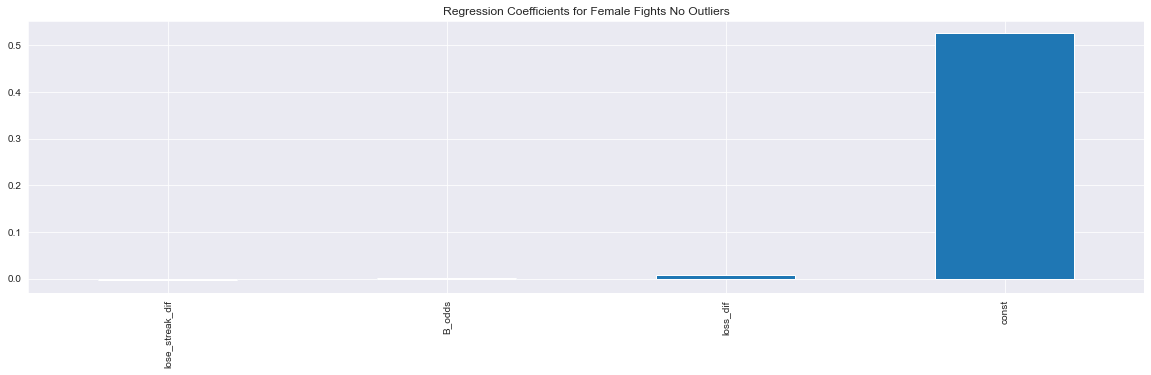

In [32]:
#Plot these variables in ascending order
coef_f3.sort_values().plot(kind='bar')
plt.title('Regression Coefficients for Female Fights No Outliers')
plt.show()

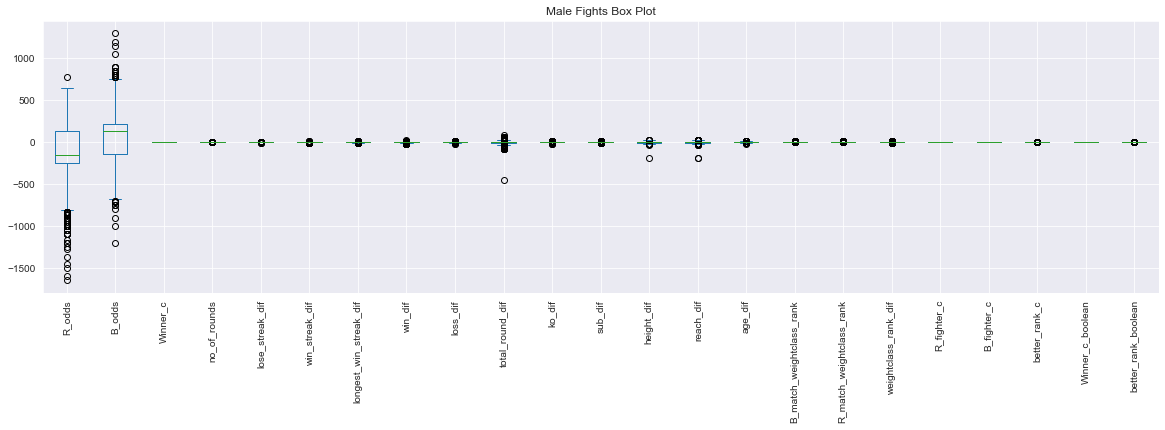

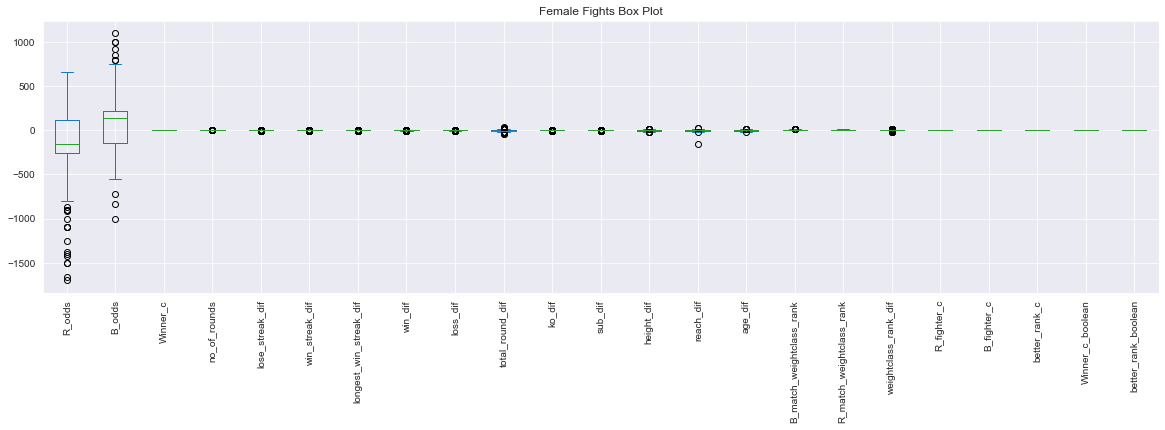

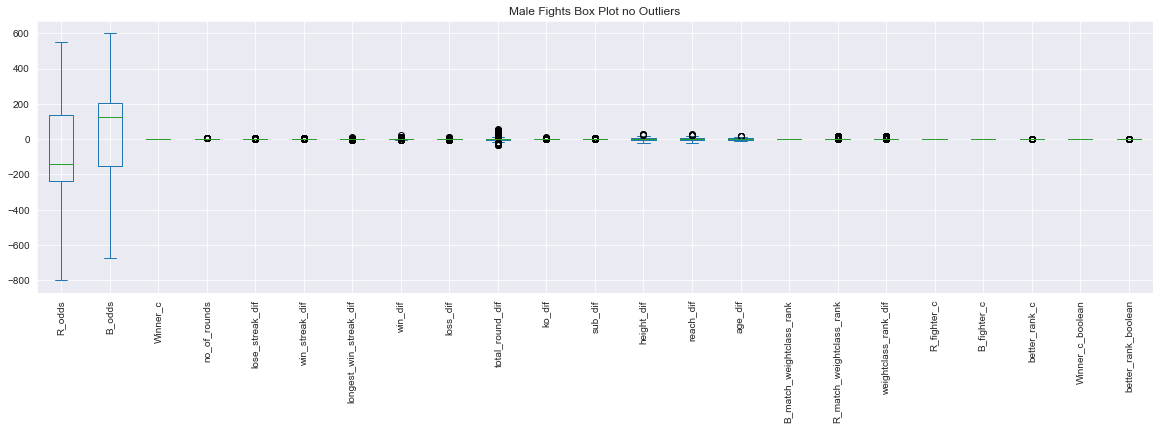

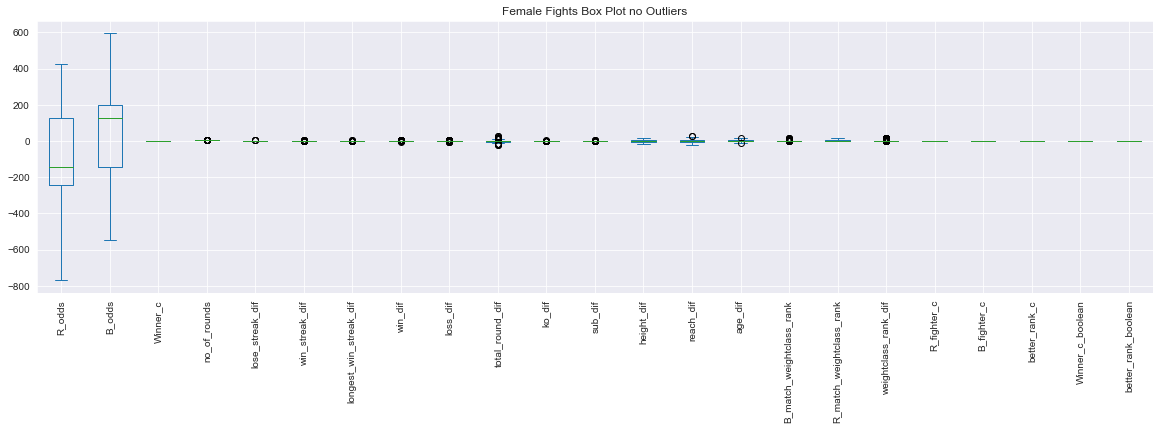

In [42]:
#Box and whisker plots for male and female fights with and without outliers in variables of interest
df_m.plot(kind='box', title='Male Fights Box Plot')
plt.xticks(rotation=90)
plt.show()

df_f.plot(kind='box', title='Female Fights Box Plot')
plt.xticks(rotation=90)
plt.show()

no_outliers_m3.plot(kind='box', title='Male Fights Box Plot no Outliers')
plt.xticks(rotation=90)
plt.show()

no_outliers_f3.plot(kind='box', title='Female Fights Box Plot no Outliers')
plt.xticks(rotation=90)
plt.show()

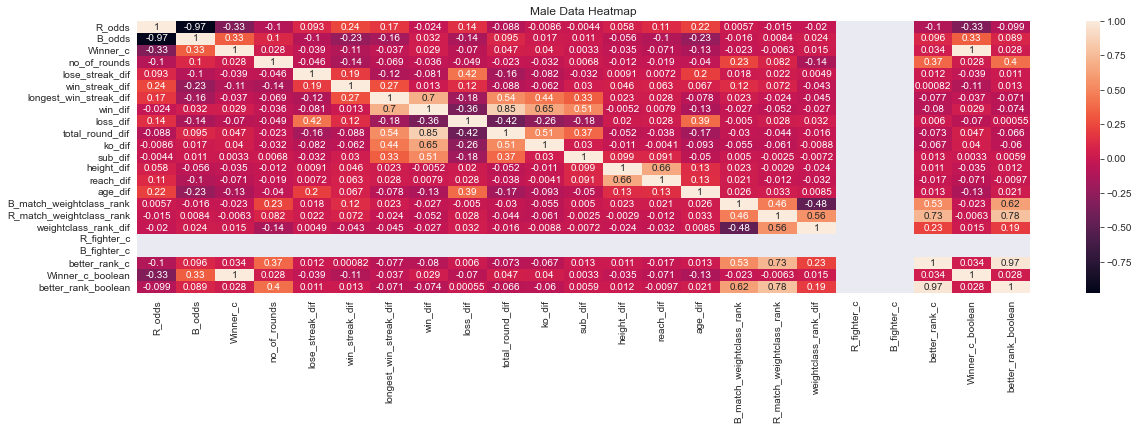

In [34]:
#Heatmap of corelations for variables in male dataset
df_m_corr=df_m.corr()
sns.heatmap(df_m_corr, annot=True)
plt.title('Male Data Heatmap')
plt.show()

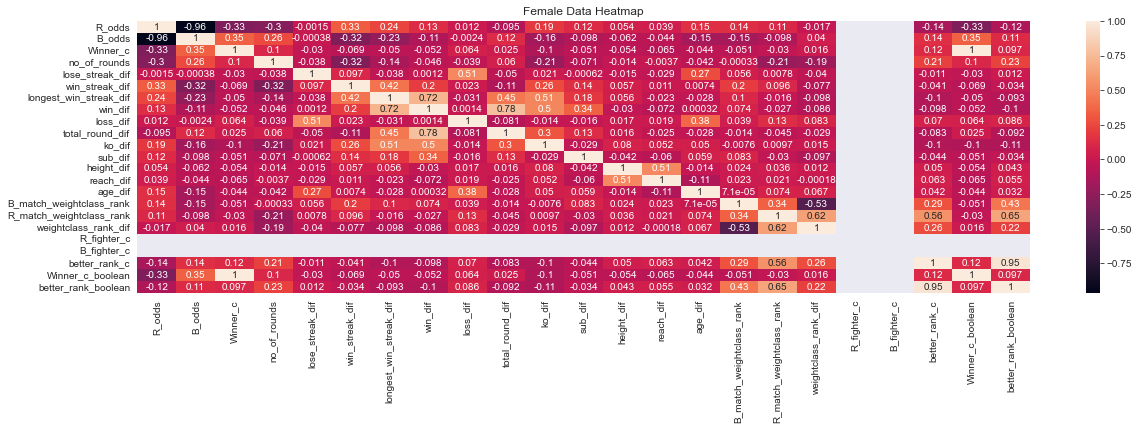

In [35]:
#Heatmap of corelations for variables in female dataset
df_f_corr=df_f.corr()
sns.heatmap(df_f_corr, annot=True)
plt.title('Female Data Heatmap')
plt.show()

In [36]:
#Looking at coralations against winner red boolean in male fights
df_m2_corr=df_m_corr['Winner_c_boolean'].sort_values(ascending = False).reset_index()
print(df_m2_corr)

                       index  Winner_c_boolean
0                   Winner_c          1.000000
1           Winner_c_boolean          1.000000
2                     B_odds          0.333963
3            total_round_dif          0.046691
4                     ko_dif          0.039615
5              better_rank_c          0.034171
6                    win_dif          0.029099
7        better_rank_boolean          0.027971
8               no_of_rounds          0.027610
9       weightclass_rank_dif          0.015329
10                   sub_dif          0.003304
11  R_match_weightclass_rank         -0.006275
12  B_match_weightclass_rank         -0.022964
13                height_dif         -0.035214
14    longest_win_streak_dif         -0.036728
15           lose_streak_dif         -0.038565
16                  loss_dif         -0.069547
17                 reach_dif         -0.071125
18            win_streak_dif         -0.106873
19                   age_dif         -0.125979
20           

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Winner_c'),
  Text(1, 0, 'Winner_c_boolean'),
  Text(2, 0, 'B_odds'),
  Text(3, 0, 'total_round_dif'),
  Text(4, 0, 'ko_dif'),
  Text(5, 0, 'better_rank_c'),
  Text(6, 0, 'win_dif'),
  Text(7, 0, 'better_rank_boolean'),
  Text(8, 0, 'no_of_rounds'),
  Text(9, 0, 'weightclass_rank_dif'),
  Text(10, 0, 'sub_dif'),
  Text(11, 0, 'R_match_weightclass_rank'),
  Text(12, 0, 'B_match_weightclass_rank'),
  Text(13, 0, 'height_dif'),
  Text(14, 0, 'longest_win_streak_dif'),
  Text(15, 0, 'lose_streak_dif'),
  Text(16, 0, 'loss_dif'),
  Text(17, 0, 'reach_dif'),
  Text(18, 0, 'win_streak_dif'),
  Text(19, 0, 'age_dif'),
  Text(20, 0, 'R_odds'),
  Text(21, 0, 'R_fighter_c'),
  Text(22, 0, 'B_fighter_c')])

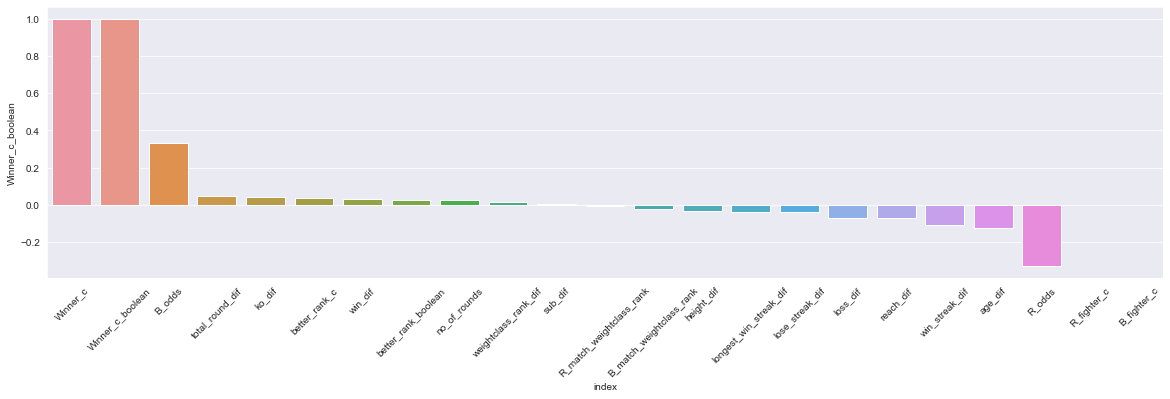

In [37]:
#Plot the male corelation strengths
sns.barplot(data=df_m2_corr, x='index', y='Winner_c_boolean')

plt.xticks(rotation=45)


In [38]:
#Looking at corelations against red wins for female fights
df_f2_corr=df_f_corr['Winner_c_boolean'].sort_values(ascending = False).reset_index()
print(df_f2_corr)

                       index  Winner_c_boolean
0           Winner_c_boolean          1.000000
1                   Winner_c          1.000000
2                     B_odds          0.347376
3              better_rank_c          0.116070
4               no_of_rounds          0.102842
5        better_rank_boolean          0.097381
6                   loss_dif          0.063517
7            total_round_dif          0.025271
8       weightclass_rank_dif          0.015550
9   R_match_weightclass_rank         -0.029878
10           lose_streak_dif         -0.030191
11                   age_dif         -0.044006
12    longest_win_streak_dif         -0.050084
13  B_match_weightclass_rank         -0.051013
14                   sub_dif         -0.051127
15                   win_dif         -0.052067
16                height_dif         -0.054009
17                 reach_dif         -0.065334
18            win_streak_dif         -0.068761
19                    ko_dif         -0.103379
20           

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Winner_c_boolean'),
  Text(1, 0, 'Winner_c'),
  Text(2, 0, 'B_odds'),
  Text(3, 0, 'better_rank_c'),
  Text(4, 0, 'no_of_rounds'),
  Text(5, 0, 'better_rank_boolean'),
  Text(6, 0, 'loss_dif'),
  Text(7, 0, 'total_round_dif'),
  Text(8, 0, 'weightclass_rank_dif'),
  Text(9, 0, 'R_match_weightclass_rank'),
  Text(10, 0, 'lose_streak_dif'),
  Text(11, 0, 'age_dif'),
  Text(12, 0, 'longest_win_streak_dif'),
  Text(13, 0, 'B_match_weightclass_rank'),
  Text(14, 0, 'sub_dif'),
  Text(15, 0, 'win_dif'),
  Text(16, 0, 'height_dif'),
  Text(17, 0, 'reach_dif'),
  Text(18, 0, 'win_streak_dif'),
  Text(19, 0, 'ko_dif'),
  Text(20, 0, 'R_odds'),
  Text(21, 0, 'R_fighter_c'),
  Text(22, 0, 'B_fighter_c')])

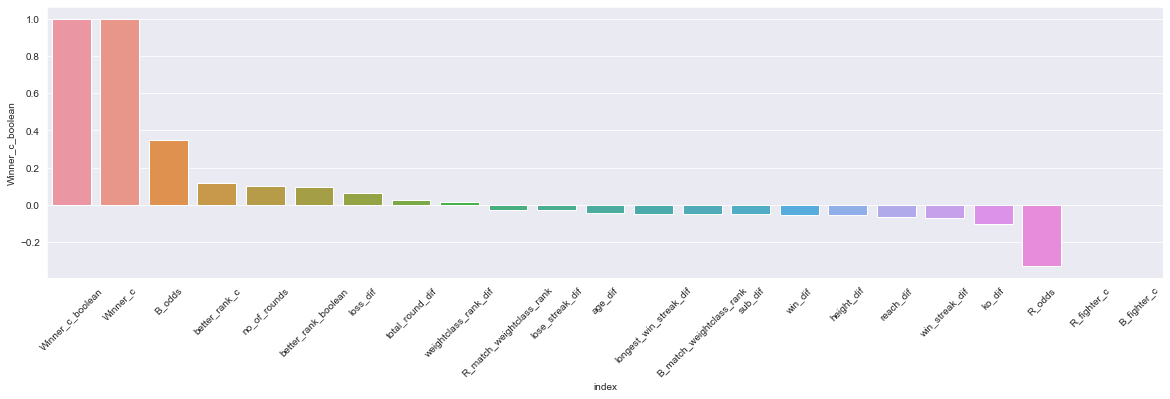

In [39]:
#Plot the female corelation strengths
sns.barplot(data=df_f2_corr, x='index', y='Winner_c_boolean')
plt.xticks(rotation=45)